# Vježbe 1 - drugi dio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

## Linearna regresija

1. Vaš zadatak za zadaću: implementacija modela linearne regresije
2. Primjena tog modela na podatke uz dodarno korištenje različitih alata s kojima smo se upoznali

### Zadatak 1. Data exploatory analysis

Model linearne regresije primjenit ćemo na jednom skupu podataka. Prije toga, potrebno je učitati podatke, upoznati ih i analizirati. 

#### 1. Učitavanje podataka

In [2]:
df = pd.read_csv('./Podaci/winequality-white.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### 2. Informacije o skupu podataka
Broj podataka, broj varijabli, tip podataka varijabli

In [3]:
df.info()
df.columns,df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


(Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
        'residual sugar', 'chlorides', 'free sulfur dioxide',
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
        'quality'],
       dtype='object'),
 type                     object
 fixed acidity           float64
 volatile acidity        float64
 citric acid             float64
 residual sugar          float64
 chlorides               float64
 free sulfur dioxide     float64
 total sulfur dioxide    float64
 density                 float64
 pH                      float64
 sulphates               float64
 alcohol                 float64
 quality                   int64
 dtype: object)

#### 3. Analiza svake varijable posebno
Ako je varijabla numerička - dobijemo relevantne kvantitativne mjere poput aritmetičke sredine, medijana i sl. 

Varijabla $quality$ unatoč tome što je numrička zapravo predstavlja ocjenu vina, a to je opet neka kategorija koja poprima vrijednosti $1-10$. <br>
Kod takvih varijabli je upitno koliko će nam ova analiza imati smisla. Ali možemo saznati neke stvari poput toga da je najmanja ocjena $3$, a najveća ocjena $9$. <br>


In [10]:
df['alcohol'].describe()


count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [9]:
df['quality'].describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

#### 4. Analiza svake varijable posebno - grafički
Prethodno izračunate kvantitativne mjere je često *zanimljivije* vidjeti na grafu - histogram

<AxesSubplot:xlabel='quality', ylabel='Count'>

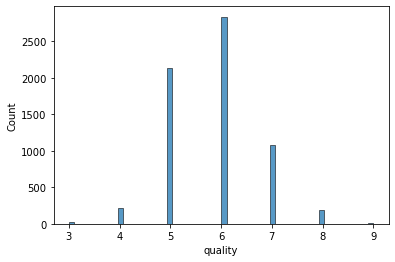

In [17]:
sns.histplot(df['quality'])

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

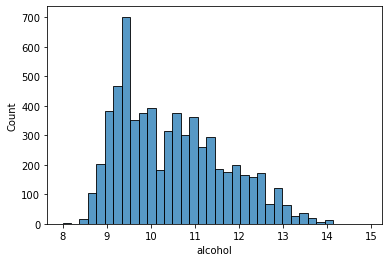

In [19]:
sns.histplot(df['alcohol'])

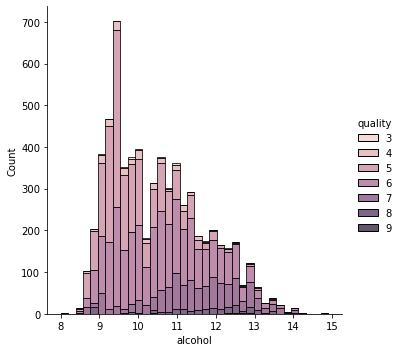

In [22]:
sns.displot(df, x='alcohol', hue = 'quality', multiple = 'stack')

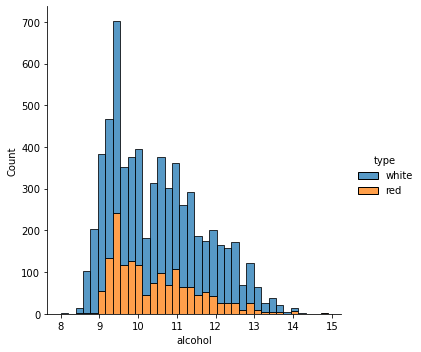

In [24]:
sns.displot(df, x="alcohol", hue="type", multiple="stack")


#### 5. Veza između numeričkih varijabli

Postoji li veza između količine alkohola u vinu i gustoće? Količine kiseline i ph-a? Za neke varijable očekujemo da su povezane. 

Grafički koristeći *scatter_plot* možemo to ispitati. 

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alcohol', ylabel='density'>

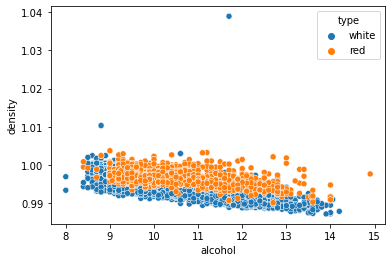

In [34]:
sns.scatterplot(df['alcohol'],df['density'], hue=df["type"])

<AxesSubplot:xlabel='residual sugar', ylabel='free sulfur dioxide'>

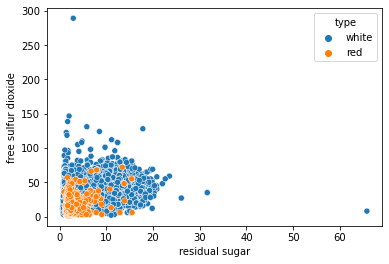

In [33]:
sns.scatterplot(data=df, x="residual sugar", y="free sulfur dioxide",hue="type")

<AxesSubplot:xlabel='pH', ylabel='volatile acidity'>

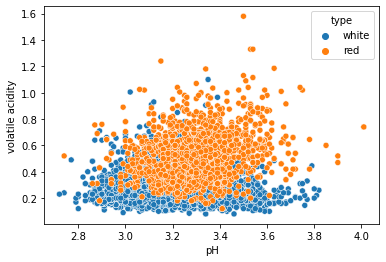

In [36]:
sns.scatterplot(data=df, x="pH", y="volatile acidity", hue="type")


#### 6. Histogrami - usporedba varijabli (kategorija)

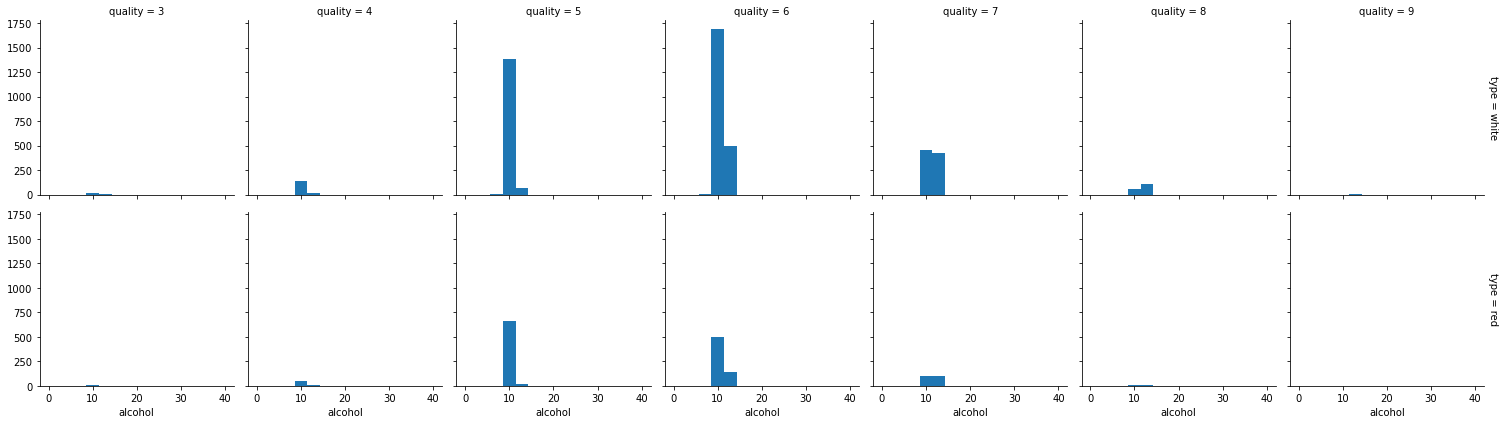

In [37]:
grid = sns.FacetGrid(df, row="type", col="quality", margin_titles=True)
grid.map(plt.hist, "alcohol", bins=np.linspace(0, 40, 15));

#### 7. Boxplot

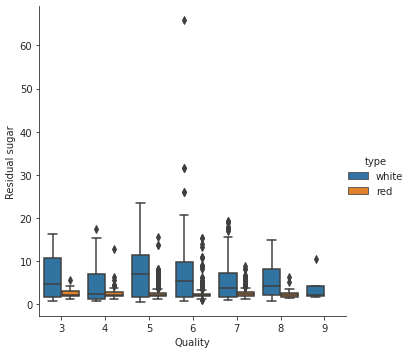

In [44]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data=df, x="quality", y="residual sugar", hue="type",kind="box")
    g.set_axis_labels("Quality", "Residual sugar")
    

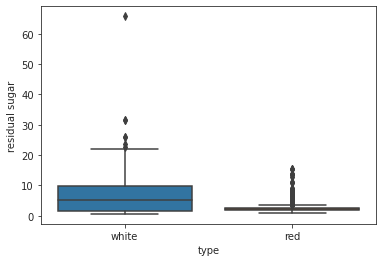

In [45]:
with sns.axes_style(style='ticks'):
    g = sns.boxplot(x="type", y="residual sugar", data=df)

#### 8. Koreliranost podataka

Naredba dataframe.corr() računa Pearsonov koeficijent korelacije između varijabli. <br>
Prisjetimo se, za zadani par slučajnih varijabli $(X,Y)$ Pearsonov koeficijent korelacije definiramo kao 
$$ \rho_{x,y} = \frac{cov(X,Y)}{\sigma_X \cdot \sigma_Y},$$
gdje je $cov(X,Y)$ kovarijanca = $E[(X-E[X])\cdot(Y-E[Y])]$, a $\sigma_X$ je standardna devijacije slučajne varijable $X$,  $\sigma_X = \sqrt(Var(X))$, $Var(X)=E(X-EX)^2$. <br>
- Ako su $X,Y$ nezavisne, onda je Pearsonov koeficijent $\rho_{X,Y} = 0$
- ako je $Y=aX + b$ za neki koeficijent $a>0$ i neki $b$ onda je $\rho_{X,Y} =1$
- ako je $Y=aX + b$ za neki koeficijent $a<0$ i neki $b$ onda je $\rho_{X,Y} =-1$

In [47]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


<AxesSubplot:>

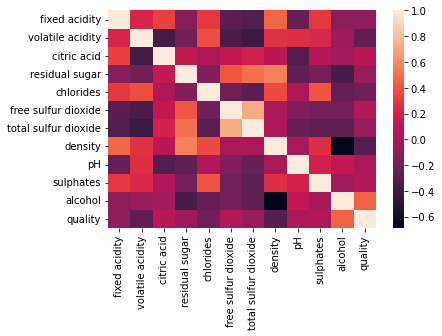

In [48]:
sns.heatmap(df.corr())

## Zadatak 2: Priprema podataka

#### 1. 
Uočili smo snažnu koreliranost između varijebli $density$ i $alcohol$. Možemo li postaviti model linearne regresije koji ćemo naučiti da za zadanu vrijednost alkohola procijeni kolika je gustoća vina? Prvo nam trebaju podaci u toj formi. 

Ulazna varijabla $X$ je količina alkohola, a izlazna varijabla $y$ je gustoća. <br>


In [49]:
X = df['alcohol'].to_numpy()
y= df['density'].to_numpy()

#### 2. 
Priprema podataka za treniranje: podjela, obrada
- uobičajeno je podatke s kojima radimo podijeliti na 2 ili 3 dijela
    - kasnije nešto više o tome
    - za sada koristimo kao činjenicu da podatke želimo podijeliti na 2 dijela
    - jedan skup podataka (veći) nazvat ćemo trening skup, a drugi skup (manji) testni skup
    - podjela podataka može biti u omjeru npr. trening 70% - test 30% 
    - to možemo napraviti ručno: odabrati koje točno podatke gdje želimo ili nasumično staviti neke podatke 
    - osim toga možemo koristiti neke funkcije koje to rade
- najjednostavnije je korištenje gotovih funkcija iz scikit-learna
    - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
#print(X_train, X_test, y_train, y_test)
#print(type(X_train))
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
scaler = preprocessing.StandardScaler()
scaler.fit(X_train,y_train)

X_train = scaler.transform(X_train)
X_test = scaler.fit_transform(X_test)

## Zadatak 3: Upoznavanje modela linearne regresije iz scikit-learna

Model linearne regresije je implementiran kao klasa. Prilikom instanciranja možemo postaviti sljedeće parametre:
- fit_intercept
    - bool
    - zadano je True
    - određuje treba li računati pomak ili ne
- normalize:
    - bool
    - zadano je False
    - ako je fit_intercept False, ovaj parametar se ignorira
    - ako je True, podaci su normalizirani tako da se oduzme aritmetička sredina i podijeli sa L2 normom
    
Nakon što smo postavili model imamo dostupne sljedeće metode
- fit(X, y) treniramo model
- predict(X) vraća predikciju za neki podatak na temelju natreniranih težina
- score(X,y) računa predikcije i uspoređuje sa stvarnim vrijednostima te vraća koeficijent (više na https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)  

I atribute:
- coef_
- intercept_ 

#### 1. Postavljanje i učenje modela

In [63]:
# Klasa
# LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train,y_train)
lr.coef_,lr.intercept_


(array([[-0.00206917]]), array([0.99468392]))

#### 2. Testiranje modela

In [66]:
loss = 0 
for i, prediction in enumerate(lr.predict(X_test)):
    loss = loss + (prediction - y_test[i])**2
print(loss/ (2*X_test.shape[0]))


[2.70219778e-06]


In [67]:
lr.score(X_test,y_test)

0.43376751042850326

#### 3. Grafički prikaz rezultata modela
(Za vježbu)

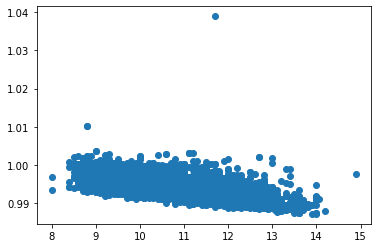

In [65]:
plt.scatter(X,y)